In [70]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import h5py
from math import pi

from analysis.config import birds, h5_path_dict, pickle_dir
from analysis.ExpData import ExpData
from analysis.utils import popln_overlap

In [82]:
with open(pickle_dir / 'population_patterns.p', 'rb') as f: 
    population_patterns = pickle.load(f)

In [83]:
def plot_overlaps(all_overlaps, title):
    plt.figure()
    plt.hist(all_overlaps, bins=10, alpha=0.4, weights=np.ones(len(all_overlaps)) / len(all_overlaps))
    plt.title(title, fontsize=14)
    plt.ylabel("Proportion of Visits", fontsize=12)
    plt.xlabel("Population Overlap", fontsize=12)
    plt.xlim((0,1))
    plt.ylim((0, 0.75))
    plt.show()
    print(len(all_overlaps))

# Activity Overlap Between Caching and Retrieval of Same Cache

/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered


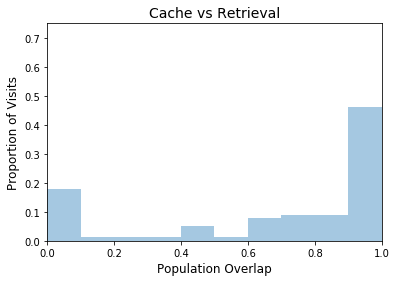

78


In [84]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.cr_sites[exp_data.cr_was_cache][i]
        cache_pattern_mat = visit_patterns[c_visit]
        overlaps = []
        for j, r_visit in enumerate(r_visits):
            r_site = exp_data.cr_sites[exp_data.cr_was_retrieval][j]
            if r_site != c_site: continue
            if r_visit < c_visit: continue
            retriev_pattern_mat = visit_patterns[r_visit]
            for retriev_pattern in retriev_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(cache_pattern_mat, retriev_pattern)
                    ))
            break
        if len(overlaps) > 0:
            all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Cache vs Retrieval")

# Activity Overlap Between Caching and Retrieval of Different Cache

/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered


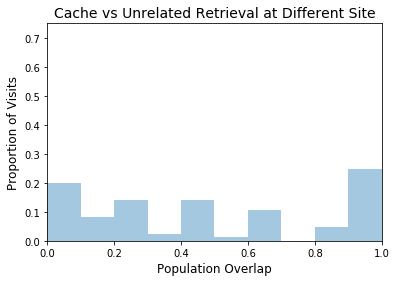

85


In [85]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.cr_sites[exp_data.cr_was_cache][i]
        cache_pattern_mat = visit_patterns[c_visit]
        overlaps = []
        for j, r_visit in enumerate(r_visits):
            r_site = exp_data.cr_sites[exp_data.cr_was_retrieval][j]
            if r_site == c_site: continue
            if r_visit < c_visit: continue
            retriev_pattern_mat = visit_patterns[r_visit]
            for retriev_pattern in retriev_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(cache_pattern_mat, retriev_pattern)
                    ))
            break
        if len(overlaps) > 0:
            all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Cache vs Unrelated Retrieval at Different Site")

# Activity Overlap Between Caching and Retrieval at Same Site

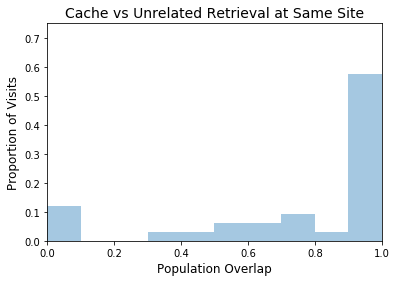

33


In [86]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.cr_sites[exp_data.cr_was_cache][i]
        cache_pattern_mat = visit_patterns[c_visit]
        overlaps = []
        retrieved = False
        for j, r_visit in enumerate(r_visits):
            r_site = exp_data.cr_sites[exp_data.cr_was_retrieval][j]
            if r_site != c_site: continue
            if (r_visit > c_visit) and not retrieved:
                retrieved = True
                continue
            retriev_pattern_mat = visit_patterns[r_visit]
            for retriev_pattern in retriev_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(cache_pattern_mat, retriev_pattern)
                    ))
            break
        if len(overlaps) > 0:
            all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Cache vs Unrelated Retrieval at Same Site")

# Activity Overlap Between Same Site Caching

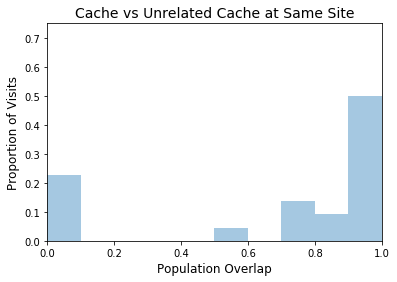

22


In [87]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.cr_sites[exp_data.cr_was_cache][i]
        cache_pattern_mat = visit_patterns[c_visit]
        overlaps = []
        retrieved = False
        for j, c2_visit in enumerate(c_visits):
            if j <= i: continue
            c2_site = exp_data.cr_sites[exp_data.cr_was_cache][j]
            if c_site != c2_site: continue
            retriev_pattern_mat = visit_patterns[c2_visit]
            for retriev_pattern in retriev_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(cache_pattern_mat, retriev_pattern)
                    ))
            break
        if len(overlaps) > 0:
            all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Cache vs Unrelated Cache at Same Site")

# Activity Overlap Between Different Site Caching

/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: All-NaN slice encountered


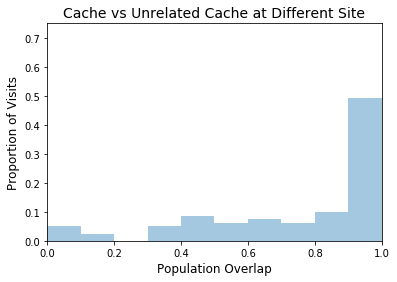

81


In [88]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.cr_sites[exp_data.cr_was_cache][i]
        cache_pattern_mat = visit_patterns[c_visit]
        overlaps = []
        retrieved = False
        for j, c2_visit in enumerate(c_visits):
            if j <= i: continue
            c2_site = exp_data.cr_sites[exp_data.cr_was_cache][j]
            if c_site == c2_site: continue
            retriev_pattern_mat = visit_patterns[c2_visit]
            for retriev_pattern in retriev_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(cache_pattern_mat, retriev_pattern)
                    ))
            break
        if len(overlaps) > 0:
            all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Cache vs Unrelated Cache at Different Site")

# Activity Overlap Between Same Site Retrieval

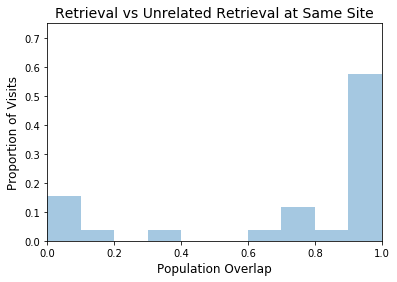

26


In [89]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, r_visit in enumerate(r_visits):
        r_site = exp_data.cr_sites[exp_data.cr_was_retrieval][i]
        cache_pattern_mat = visit_patterns[r_visit]
        overlaps = []
        for j, r2_visit in enumerate(r_visits):
            if j <= i: continue
            r2_site = exp_data.cr_sites[exp_data.cr_was_retrieval][j]
            if r_site != r2_site: continue
            retriev_pattern_mat = visit_patterns[r2_visit]
            for retriev_pattern in retriev_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(cache_pattern_mat, retriev_pattern)
                    ))
            break
        if len(overlaps) > 0:
            all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Retrieval vs Unrelated Retrieval at Same Site")

# Activity Overlap Between Different Site Retrieval

/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: All-NaN slice encountered


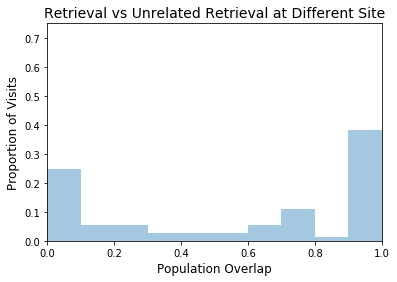

73


In [90]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, r_visit in enumerate(r_visits):
        r_site = exp_data.cr_sites[exp_data.cr_was_retrieval][i]
        cache_pattern_mat = visit_patterns[r_visit]
        overlaps = []
        for j, r2_visit in enumerate(r_visits):
            if j <= i: continue
            r2_site = exp_data.cr_sites[exp_data.cr_was_retrieval][j]
            if r_site == r2_site: continue
            retriev_pattern_mat = visit_patterns[r2_visit]
            for retriev_pattern in retriev_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(cache_pattern_mat, retriev_pattern)
                    ))
            break
        if len(overlaps) > 0:
            all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Retrieval vs Unrelated Retrieval at Different Site")

# Activity Overlap Between Caching and Arbitrary Visit

/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: All-NaN slice encountered


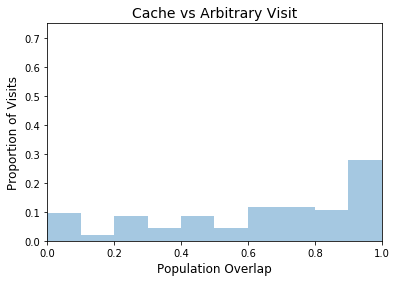

93


In [91]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, c_visit in enumerate(c_visits):
        c_site = exp_data.cr_sites[exp_data.cr_was_cache][i]
        cache_pattern_mat = visit_patterns[c_visit]
        overlaps = []
        for j, noncr_visit in enumerate(noncr_visits):
            noncr_site = exp_data.visit_wedges[noncr_visit]
            if noncr_site != c_site: continue
            retriev_pattern_mat = visit_patterns[noncr_visit]
            for retriev_pattern in retriev_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(cache_pattern_mat, retriev_pattern)
                    ))
            break
        if len(overlaps) > 0:
            all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Cache vs Arbitrary Visit")

# Activity Overlap Between Retrieval and Arbitrary Visit

/home/chingf/anaconda3/envs/analysis-env/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: All-NaN slice encountered


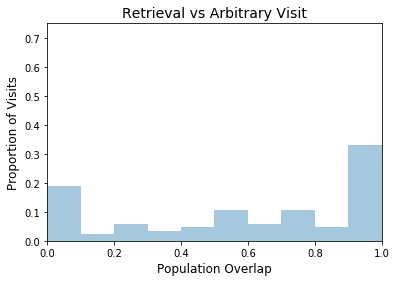

85


In [92]:
all_overlaps = []
for fil_string in population_patterns.keys():
    f = h5py.File(fil_string, 'r')
    exp_data = ExpData(f)
    c_visits = population_patterns[fil_string]['c_visits']
    r_visits = population_patterns[fil_string]['r_visits']
    noncr_visits = population_patterns[fil_string]['noncr_visits']
    fr = population_patterns[fil_string]['fr']
    visit_patterns = population_patterns[fil_string]['visit_patterns']
    for i, r_visit in enumerate(r_visits):
        r_site = exp_data.cr_sites[exp_data.cr_was_retrieval][i]
        cache_pattern_mat = visit_patterns[r_visit]
        overlaps = []
        for j, noncr_visit in enumerate(noncr_visits):
            noncr_site = exp_data.visit_wedges[noncr_visit]
            if noncr_site != r_site: continue
            retriev_pattern_mat = visit_patterns[noncr_visit]
            for retriev_pattern in retriev_pattern_mat.T:
                overlaps.append(np.nanmax(
                    popln_overlap(cache_pattern_mat, retriev_pattern)
                    ))
            break
        if len(overlaps) > 0:
            all_overlaps.append(np.nanmax(overlaps))
        
plot_overlaps(all_overlaps, "Retrieval vs Arbitrary Visit")